In [2]:
!pip3 install seaborn

  Using cached seaborn-0.12.2-py3-none-any.whl (293 kB)


In [3]:
# Importing libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

#### Importing Dataset

In [4]:
# Loading the dataset
df=pd.read_csv('Restaurant reviews.csv', encoding = "ISO-8859-1")

In [5]:
df.head(10)

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0
5,Beyond Flavours,Nagabhavani K,"Ambiance is good, service is good, food is aPr...",5,1 Review,5/24/2019 15:22,0
6,Beyond Flavours,Jamuna Bhuwalka,"Its a very nice place, ambience is different, ...",5,1 Review,5/24/2019 1:02,0
7,Beyond Flavours,Sandhya S,Well after reading so many reviews finally vis...,4,1 Review,5/23/2019 15:01,0
8,Beyond Flavours,Akash Thorat,"Excellent food , specially if you like spicy f...",5,"1 Review , 1 Follower",5/22/2019 23:12,0
9,Beyond Flavours,Smarak Patnaik,Came for the birthday treat of a close friend....,5,"1 Review , 1 Follower",5/22/2019 22:37,0


In [6]:
df.shape

(10000, 7)

In [7]:
data=df.copy()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


#### Cleaning & Preparing Data

In [8]:
df1 = df.drop(columns=["Reviewer","Metadata","Time","Pictures"])

In [9]:
y = df1["Rating"]
X = df1.drop(columns=["Rating"])
X

,Restaurant,Review
0,Beyond Flavours,"The ambience was good, food was quite good . h..."
1,Beyond Flavours,Ambience is too good for a pleasant evening. S...
2,Beyond Flavours,A must try.. great food great ambience. Thnx f...
3,Beyond Flavours,Soumen das and Arun was a great guy. Only beca...
4,Beyond Flavours,Food is good.we ordered Kodi drumsticks and ba...
...,...,...
9995,Chinese Pavilion,Madhumathi Mahajan Well to start with nice cou...
9996,Chinese Pavilion,This place has never disappointed us.. The foo...
9997,Chinese Pavilion,"Bad rating is mainly because of ""Chicken Bone ..."
9998,Chinese Pavilion,I personally love and prefer Chinese Food. Had...


In [10]:
df1.head()

,Restaurant,Review,Rating
0,Beyond Flavours,"The ambience was good, food was quite good . h...",5
1,Beyond Flavours,Ambience is too good for a pleasant evening. S...,5
2,Beyond Flavours,A must try.. great food great ambience. Thnx f...,5
3,Beyond Flavours,Soumen das and Arun was a great guy. Only beca...,5
4,Beyond Flavours,Food is good.we ordered Kodi drumsticks and ba...,5


<Axes: xlabel='Rating'>

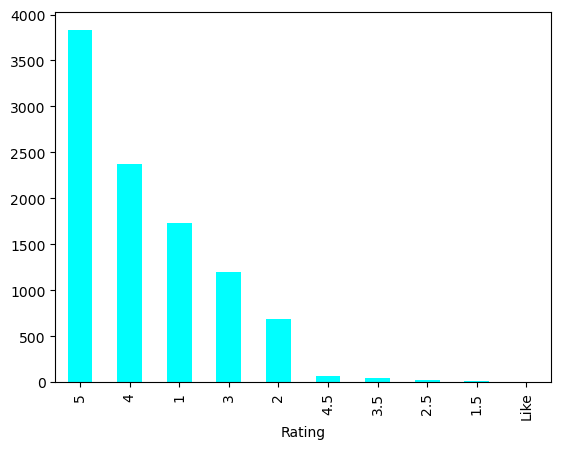

In [11]:
data['Rating'].value_counts().plot.bar(color = 'cyan')

In [12]:
y = y.replace({'Like':3})

In [13]:
y.isnull().sum()

38

In [14]:
y = pd.to_numeric(y)
y = y.fillna(y.median())

In [15]:
for i in range(0,len(y)):
    y.iloc[i] = round(y.iloc[i],0)

<Axes: xlabel='NRating'>

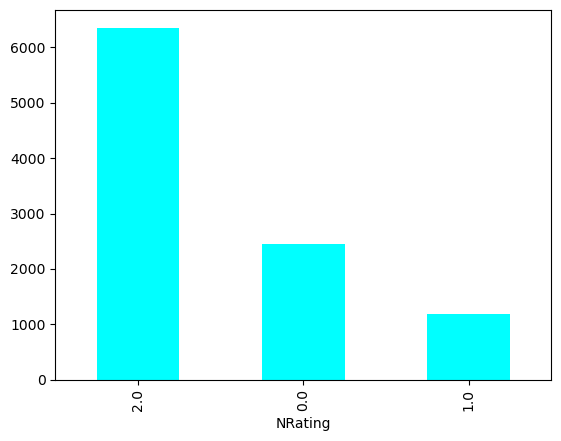

In [16]:
for i in range(0,len(y)):
    if (y[i]>3):
        y[i] = 2 #Positive
    elif (y[i]==3):
        y[i] = 1 #Neutral
    else:
        y[i] = 0 #Negative
z=y
df1['NRating']=y
df1['NRating'].value_counts().plot.bar(color = 'cyan')
# df1
# y.plot.bar(color='red')         
# y[1].value_counts().plot.bar(color = 'cyan')

### Cleaning and preprocessing text data

In [19]:
!pip3 install nltk

     ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
     ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
     ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
      --------------------------------------- 0.0/1.5 MB 1.4 MB/s eta 0:00:02
      --------------------------------------- 0.0/1.5 MB 1.4 MB/s eta 0:00:02
     -- ------------------------------------- 0.1/1.5 MB 657.6 kB/s eta 0:00:03
     -- ------------------------------------- 0.1/1.5 MB 657.6 kB/s eta 0:00:03
     --- ------------------------------------ 0.1/1.5 MB 481.4 kB/s eta 0:00:03
     --- ------------------------------------ 0.1/1.5 MB 481.4 kB/s eta 0:00:03
     ---- ----------------------------------- 0.2/1.5 MB 468.3 kB/s eta 0:00:03
     ---- ----------------------------------- 0.2/1.5 MB 468.3 kB/s eta 0:00:03
     ----- ---------------------------------- 0.2/1.5 MB 461.0 kB/s eta 0:00:03
     ----- ---------------------------------- 0.2/1.5 MB 461.0 kB/s eta

In [20]:
# Importing essential libraries for performing Natural Language Processing on 'Restaurant_Reviews.csv' dataset
# cleaning the texts
import re
import nltk

# downloading the list of stopword
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()  # applying stemming
corpus = []
for i in range(0, len(X)):
     
    # getting rid of unwanted characters
    review = re.sub('[^a-zA-Z]',' ', str(X['Review'][i])) 
    
    #Lowering the words is very imporatant in avoiding classifying same words as different words
    review = review.lower()
    
    # splitting every words from the sentences
    review = review.split() 
    
    # iterating through each words and checking if they are stopwords or not
    # if they are stopwords we will not consider them furthermore
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')] 
    
    #Reconstructing sentences
    review = ' '.join(review) 
    corpus.append(review)   

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yashp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
print(corpus)

['ambienc good food quit good saturday lunch cost effect good place sate brunch one also chill friend parent waiter soumen da realli courteou help', 'ambienc good pleasant even servic prompt food good good experi soumen da kudo servic', 'must tri great food great ambienc thnx servic pradeep subroto person recommend penn alfredo pasta also music background amaz', 'soumen da arun great guy behavior sincereti good food cours would like visit place', 'food good order kodi drumstick basket mutton biryani good thank pradeep serv well enjoy ambienc also good', 'ambianc good servic good food apradeecp subro best servic food good papiya good hostess ur caption good star restaur', 'nice place ambienc differ food order tasti servic also gud worth visit reason well realli must visit place', 'well read mani review final visit place ambienc good come food crispi corn nice tawa fish ok basket biryani disappoint us biryani ok flatter claim staff polit prompt especi pradeep suman', 'excel food special 

In [22]:
# creating the bag of words model
from sklearn.feature_extraction.text import CountVectorizer

# creating the count vectorizer model
cv = CountVectorizer(max_features=9000) #After experimenting with 7500, 5000, 2500 ...9000 worked best.

# feeding the corpus data to the count vectorizer model
X = cv.fit_transform(corpus).toarray()


In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer 
vectorizer = TfidfVectorizer() 
X = vectorizer.fit_transform(corpus) 


In [24]:
# splitting the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Applying KNN

In [25]:
from sklearn.neighbors import KNeighborsClassifier

# creating the model
classifier = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 2) 
classifier.fit(X_train, y_train)

# predicting the test set results
y_pred = classifier.predict(X_test)

#### Confusion Matrix

In [26]:
# making the confusion_matrix
from sklearn.metrics import confusion_matrix
confusion_m = confusion_matrix(y_test, y_pred)
print(confusion_m)

[[  68   10  630]
 [  14   11  338]
 [  24   18 1887]]


#### Accuracy 

In [29]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(accuracy*100)

65.53333333333333


#### Classification Report

In [30]:
from sklearn import metrics
print("Classification Report:\n")
print(metrics.classification_report(y_test, y_pred))

Classification Report:

              precision    recall  f1-score   support

         0.0       0.64      0.10      0.17       708
         1.0       0.28      0.03      0.05       363
         2.0       0.66      0.98      0.79      1929

    accuracy                           0.66      3000
   macro avg       0.53      0.37      0.34      3000
weighted avg       0.61      0.66      0.55      3000



### Applying Naive Bayes Algorithm

In [31]:
# Applying Naive Bayes
from sklearn.naive_bayes import MultinomialNB

# creating the model
restaurant_review_model = MultinomialNB().fit(X_train, y_train)

In [32]:
# predicting the test set results
y_pred = restaurant_review_model.predict(X_test)

#### Confusion Matrix

In [33]:
# making the confusion_matrix
from sklearn.metrics import confusion_matrix
confusion_m = confusion_matrix(y_test, y_pred)

In [34]:
print(confusion_m)

[[ 336    1  371]
 [  13    0  350]
 [   9    0 1920]]


#### Accuracy 

In [36]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(accuracy*100)

75.2


#### Classification Report

In [37]:
from sklearn import metrics
print("Classfication Metrics:\n")
print(metrics.classification_report(y_test, y_pred))

Classfication Metrics:

              precision    recall  f1-score   support

         0.0       0.94      0.47      0.63       708
         1.0       0.00      0.00      0.00       363
         2.0       0.73      1.00      0.84      1929

    accuracy                           0.75      3000
   macro avg       0.56      0.49      0.49      3000
weighted avg       0.69      0.75      0.69      3000



## Predictions

In [38]:
def predict_sentiment(sample_review):
  sample_review = re.sub(pattern='[^a-zA-Z]',repl=' ', string = sample_review)
  sample_review = sample_review.lower()
  sample_review_words = sample_review.split()
  sample_review_words = [word for word in sample_review_words if not word in set(stopwords.words('english'))]
  ps = PorterStemmer()
  final_review = [ps.stem(word) for word in sample_review_words]
  final_review = ' '.join(final_review)

  temp = cv.transform([final_review]).toarray()
  return classifier.predict(temp)

In [ ]:
# Predicting values
sample_review = 'Food was pretty bad and the service was very slow.'

if predict_sentiment(sample_review):
  print('This is a POSITIVE review.')
else:
  print('This is a NEGATIVE review!')

This is a NEGATIVE review!
